In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('Confusion matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [18]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [15]:
# X, y split
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

#Logistic regression
lr_clf = LogisticRegression(max_iter=2000)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)


Confusion matrix
[[90 10]
 [21 33]]
Accuracy: 0.7987, Precision: 0.7674, Recall: 0.6111,    F1: 0.6804, AUC:0.8070


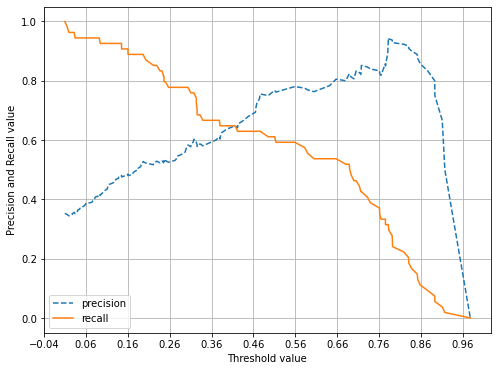

In [19]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [20]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

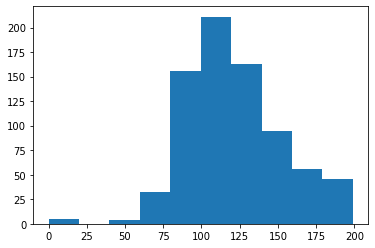

In [23]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [32]:
# 0 data treatment
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# total number of data
total_count = diabetes_data['Glucose'].count()
# number of data that is 0 for each feature
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} number of zero: {1}, its portion: {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose number of zero: 5, its portion: 0.65%
BloodPressure number of zero: 35, its portion: 4.56%
SkinThickness number of zero: 227, its portion: 29.56%
Insulin number of zero: 374, its portion: 48.70%
BMI number of zero: 11, its portion: 1.43%


In [37]:
# replace 0 to mean
for feature in zero_features:
    avg = diabetes_data[diabetes_data[feature]!=0][feature].mean()
    diabetes_data[feature] = diabetes_data[feature].replace(0, avg)

diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]
# StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify = y)

# Logistic regression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

Confusion matrix
[[93  7]
 [22 32]]
Accuracy: 0.8117, Precision: 0.8205, Recall: 0.5926,    F1: 0.6882, AUC:0.8765


In [41]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('Threshold:', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [44]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
pred_proba = lr_clf.predict_proba(X_test)[:,1].reshape(-1,1)
get_eval_by_threshold(y_test, pred_proba, thresholds)

Threshold: 0.3
Confusion matrix
[[78 22]
 [ 9 45]]
Accuracy: 0.7987, Precision: 0.6716, Recall: 0.8333,    F1: 0.7438, AUC:0.8765
Threshold: 0.33
Confusion matrix
[[82 18]
 [12 42]]
Accuracy: 0.8052, Precision: 0.7000, Recall: 0.7778,    F1: 0.7368, AUC:0.8765
Threshold: 0.36
Confusion matrix
[[85 15]
 [15 39]]
Accuracy: 0.8052, Precision: 0.7222, Recall: 0.7222,    F1: 0.7222, AUC:0.8765
Threshold: 0.39
Confusion matrix
[[85 15]
 [16 38]]
Accuracy: 0.7987, Precision: 0.7170, Recall: 0.7037,    F1: 0.7103, AUC:0.8765
Threshold: 0.42
Confusion matrix
[[87 13]
 [20 34]]
Accuracy: 0.7857, Precision: 0.7234, Recall: 0.6296,    F1: 0.6733, AUC:0.8765
Threshold: 0.45
Confusion matrix
[[91  9]
 [20 34]]
Accuracy: 0.8117, Precision: 0.7907, Recall: 0.6296,    F1: 0.7010, AUC:0.8765
Threshold: 0.48
Confusion matrix
[[92  8]
 [22 32]]
Accuracy: 0.8052, Precision: 0.8000, Recall: 0.5926,    F1: 0.6809, AUC:0.8765
Threshold: 0.5
Confusion matrix
[[93  7]
 [22 32]]
Accuracy: 0.8117, Precision: 0.82

In [48]:
# Threshold 0.36
binarizer = Binarizer(threshold=0.36)
pred_th_036 = binarizer.fit_transform(pred_proba)
get_clf_eval(y_test, pred_th_036, pred_proba)

Confusion matrix
[[85 15]
 [15 39]]
Accuracy: 0.8052, Precision: 0.7222, Recall: 0.7222,    F1: 0.7222, AUC:0.8765


In [51]:
lr_clf.predict_proba(X_test)[:,1]

array([0.03820912, 0.03876003, 0.50492881, 0.38569783, 0.25193073,
       0.47064615, 0.12633099, 0.51231686, 0.28696596, 0.6508444 ,
       0.42941874, 0.03802578, 0.19709924, 0.07339733, 0.10506611,
       0.78352171, 0.19475705, 0.48694345, 0.03055973, 0.03816205,
       0.39144469, 0.82131003, 0.14213944, 0.208424  , 0.40358105,
       0.12612291, 0.05407749, 0.35612468, 0.1911252 , 0.47914869,
       0.30007479, 0.10744581, 0.2048484 , 0.98773604, 0.21481449,
       0.29547633, 0.12503864, 0.30627956, 0.15414519, 0.1587766 ,
       0.75262696, 0.0521797 , 0.1230169 , 0.11182634, 0.29733206,
       0.33744711, 0.01685156, 0.05434043, 0.05244012, 0.77225662,
       0.13350798, 0.60803898, 0.4012423 , 0.03915549, 0.30052403,
       0.66055415, 0.19727974, 0.04214966, 0.18896109, 0.21607117,
       0.32006748, 0.28733022, 0.79251064, 0.18306688, 0.70926515,
       0.23343542, 0.1106002 , 0.05456763, 0.65693216, 0.13184652,
       0.3951365 , 0.30570001, 0.08781101, 0.96230863, 0.77976